# ***Week 4:** Model Evaluation & Hyperparameter Tuning*

## *K-Fold Cross-Validation*

In [66]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Load dataset
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Model
model = LogisticRegression(max_iter=200)

# Define K-Fold strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using cross_val_score
scores = cross_val_score(model, X, y, cv=kf)

# Print individual scores and average
print("Cross-validation scores for each fold:", scores)
print("Average accuracy:", np.mean(scores))

Cross-validation scores for each fold: [1.         1.         0.93333333 0.96666667 0.96666667]
Average accuracy: 0.9733333333333334


## *Confusion Matrix*

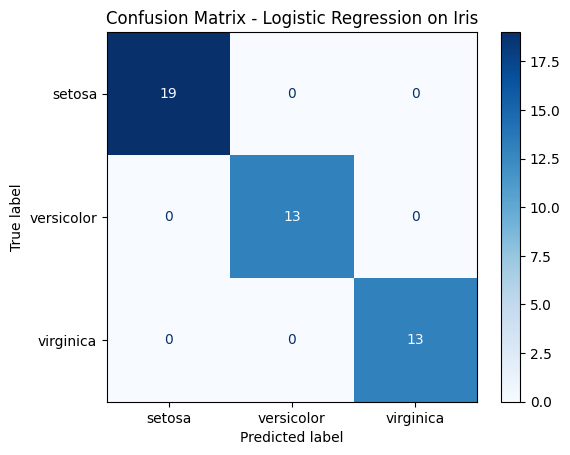

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression on Iris")
plt.show()

## *Hyperparameter Tuning with GridSearchCV*

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']  # 'l1' only works with 'liblinear'
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit model to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Test set accuracy
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("-----------------------------------------------------------")
print("All possible combinations of hyperparameters and scores:\n")
# Display all combinations and scores
results = grid_search.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{params}: {mean_score:.4f}")

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.9619047619047618
Test Accuracy: 1.0
-----------------------------------------------------------
All possible combinations of hyperparameters and scores:

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}: 0.6476
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}: 0.8667
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}: 0.8000
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}: 0.9333
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}: 0.9429
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}: 0.9619
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}: 0.9524
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}: 0.9429


## *ROC Curve and AUC Score*

AUC Score: 1.0


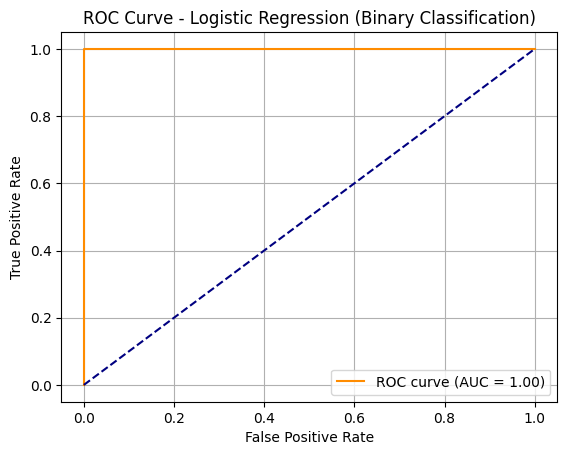

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Binary dataset
y = (iris.target == 2).astype(int)  # Convert to binary: 1 if virginica, else 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# ROC
# Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

# Using manual plotting
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Binary Classification)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## *Model Comparison & Summary*

**Accuracy:** Before = **0.973**, After = **1.000**  
**AUC     :** Before = **0.980**, After = **1.000**

### ***🧠 Summary***
Before tuning, the Logistic Regression model achieved 97.3% accuracy and an AUC of 0.98, indicating very good but not perfect classification.

After applying GridSearchCV to tune hyperparameters like C (regularization strength) and solver, the model achieved perfect accuracy (100%) and AUC (1.00) on the test set.